Time series model using ARIMA  MODEL

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [1]:
df.tail()

NameError: name 'df' is not defined

In [12]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [13]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [15]:
#Changing the column names of the dataset
df.columns=["Months","Sales"]
df.head()

,Months,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [16]:
#deleting the 106th row as it contains NaN Value
df.drop(106,axis=0,inplace=True)
df.tail()

,Months,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [17]:
df.drop(105,axis=0,inplace=True)
df.tail()

,Months,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [18]:
#Changing the value of the data type to Datetime
df['Months'] = pd.to_datetime(df['Months'])

In [19]:
df.head()

,Months,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [20]:
# Setting month column as INDEX column
df.set_index('Months',inplace=True)
df.head()

,Sales
Months,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<Axes: xlabel='Months'>

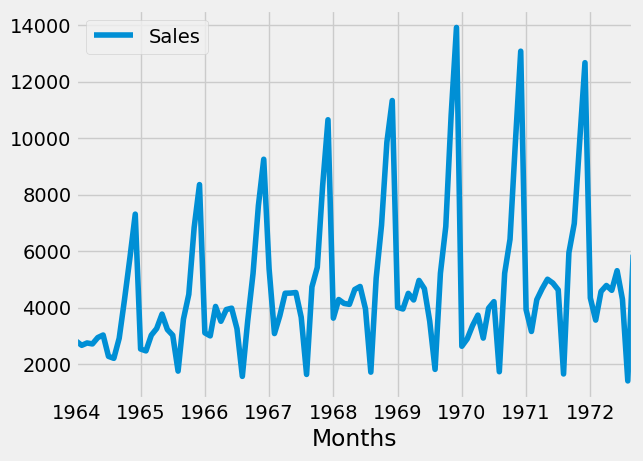

In [21]:
df.plot()


Augmented Dickey-Fuller Test 

The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.

The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. If the p-value is above a critical size, then we cannot reject that there is a unit root.

The p-values are obtained through regression surface approximation from Mac Kinnon 1994, but using the updated 2010 tables. If the p-value is close to significant, then the critical values should be used to judge whether to reject the null.

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
test_results = adfuller(df['Sales'])

In [27]:
#H0 : It is non stationary
#H1 : It is stationary

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistics', 'P-Value', '#Lags Used', 'Number of Observation used']
    for value,label in zip(result,labels):
        print(label+ ':'+ str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(H0, Reject the null hypothesis)")
        
    else:
        print("Weak evidence against the null hypothesis, time series has a unit root, indicating it is non stationary")

In [28]:
adfuller_test(df['Sales'])

ADF Test Statistics:-1.8335930563276195
P-Value:0.3639157716602467
#Lags Used:11
Number of Observation used:93
Weak evidence against the null hypothesis, time series has a unit root, indicating it is non stationary


In [ ]:
#Differencing
# Shifting a column
# as the data is seasonal (means uniform across the year) we should shift the data by 12(12 Months per year)

In [32]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)
df.head(14)


,Sales,Sales First Difference
Months,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
1964-06-01,3036.0,90.0
1964-07-01,2282.0,-754.0
1964-08-01,2212.0,-70.0
1964-09-01,2922.0,710.0


In [33]:
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Months,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [34]:
#Testing again with Dickey Fuller Test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistics:-7.626619157213166
P-Value:2.0605796968136632e-11
#Lags Used:0
Number of Observation used:92
Strong evidence against the null hypothesis(H0, Reject the null hypothesis)


<Axes: xlabel='Months'>

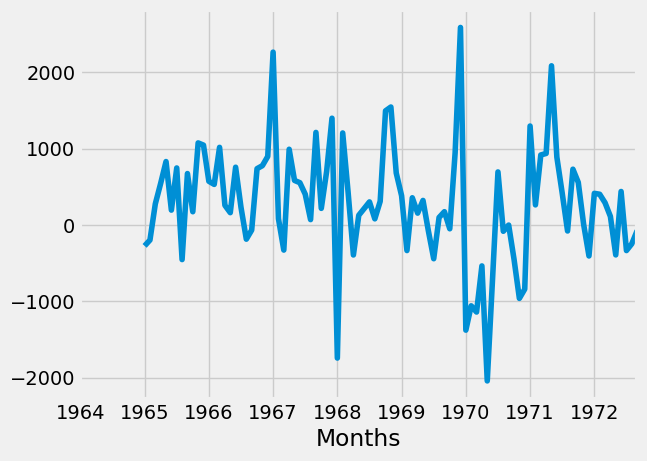

In [35]:
df['Seasonal First Difference'].plot()



We need to calculate how many lags we need to include to predict the sales value for today
so we will use Auto Correlation Function (ACF) and Partial Auto Correlation Function (PACF)

Identification of AR Model (Auto Regressive Model) - PACF

For an AR model, the theoretical PACF "Shuts off" past the order of the model. The phrase "Shuts off" means that in theory the partial auto correlations are equal to 0 beyond that point

Identification of MA Model (Moving Average Model) - ACF

For MA model the theoretical PACF does not shut off but instead tapers towards 0 in some manner.The clear pattern for MA model is ACF

P- AR model Lags
d- Differencing
q- MA lags



In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

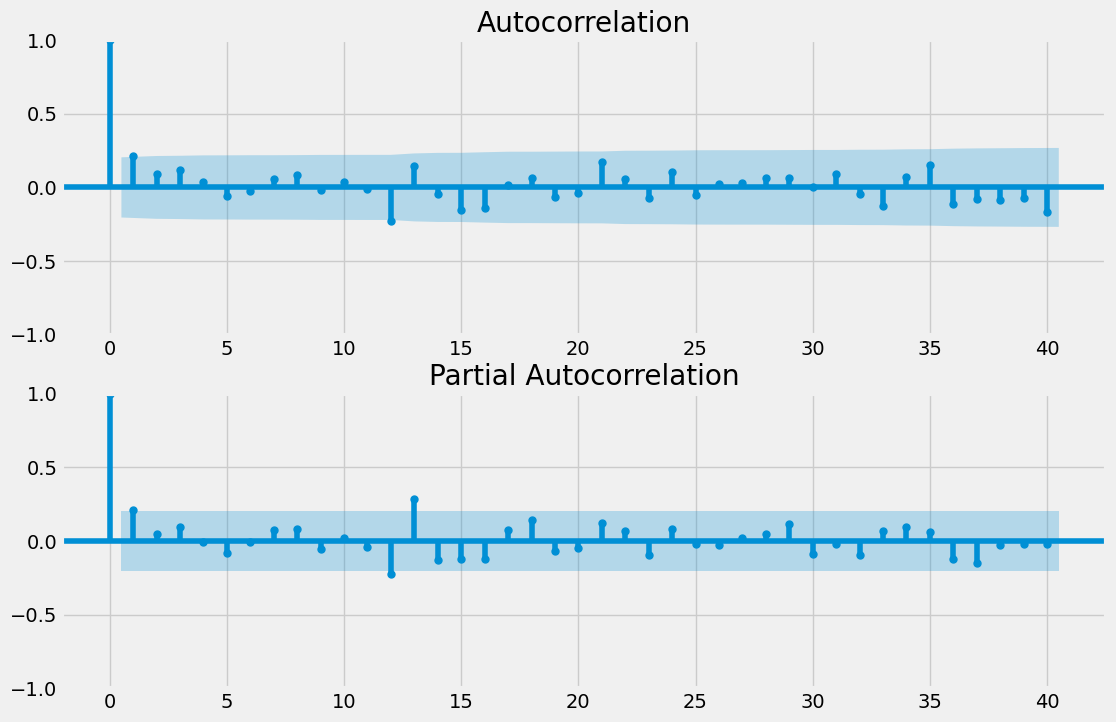

In [37]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)


In [38]:
#for non seasonal data
# p=1, d=1 or 0

from statsmodels.tsa.arima_model import ARIMA

In [39]:
model = ARIMA(df['Sales'], order=(1,1,1))
model_fit = model.fit()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [40]:
model_fit.summary()


NameError: name 'model_fit' is not defined

AS THIS IS SEASONAL DATA -ARIMA IS NOT WORKING WELL, WILL TRY WITH SARIMA WHICH IS SEASONAL ARIMA

In [41]:
import statsmodels.api as sm

In [43]:
# order value p=1,d=1,q=1/0
#seasonal_order=(p,d,q,lags)
model = sm.tsa.statespace.SARIMAX(df['Sales'], order = (1,1,1), seasonal_order=(1,1,1,12))
results=model.fit()

c:\Users\balendran\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\balendran\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [45]:
# order value p=1,d=1,q=0
model = sm.tsa.statespace.SARIMAX(df['Sales'], order = (1,1,0), seasonal_order=(1,1,0,12))
results=model.fit()

c:\Users\balendran\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\balendran\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


PREDICTION

<Axes: xlabel='Months'>

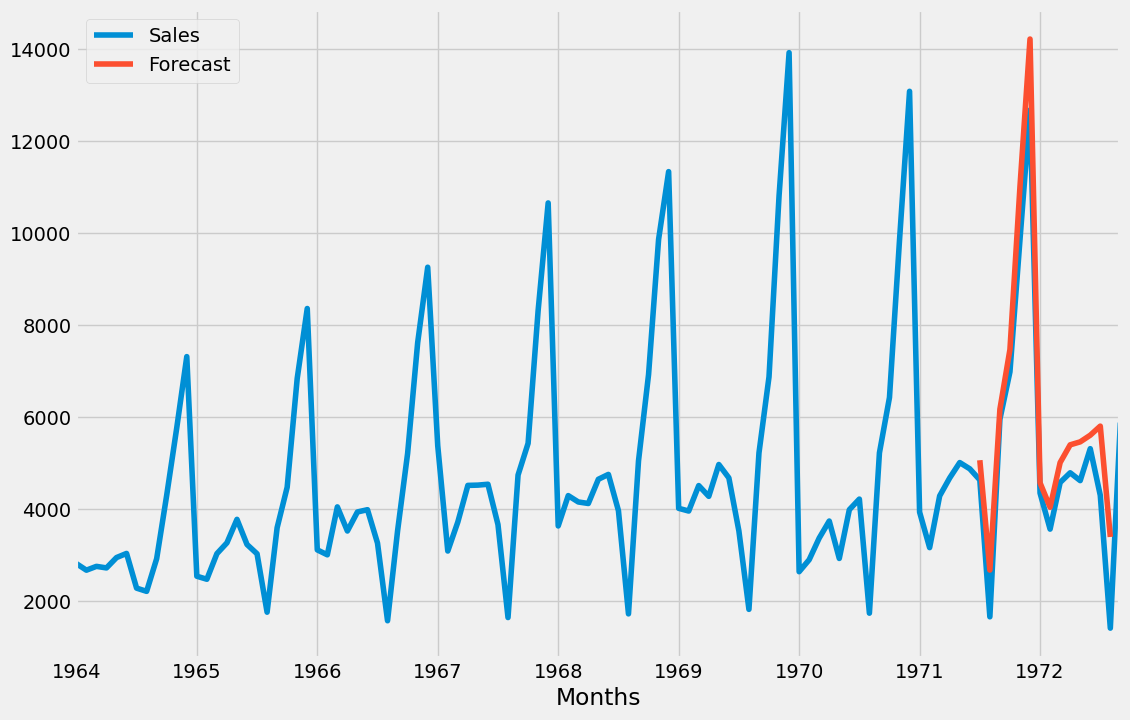

In [46]:
df['Forecast'] = results.predict(start=90, end=103, dynamic=True)
df[['Sales','Forecast']].plot(figsize=(12,8))

In [49]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [50]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [51]:
future_dates_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,Forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [52]:
future_df = pd.concat([df,future_dates_df])

C:\Users\balendran\AppData\Local\Temp\ipykernel_4244\4136492854.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df = pd.concat([df,future_dates_df])


<Axes: >

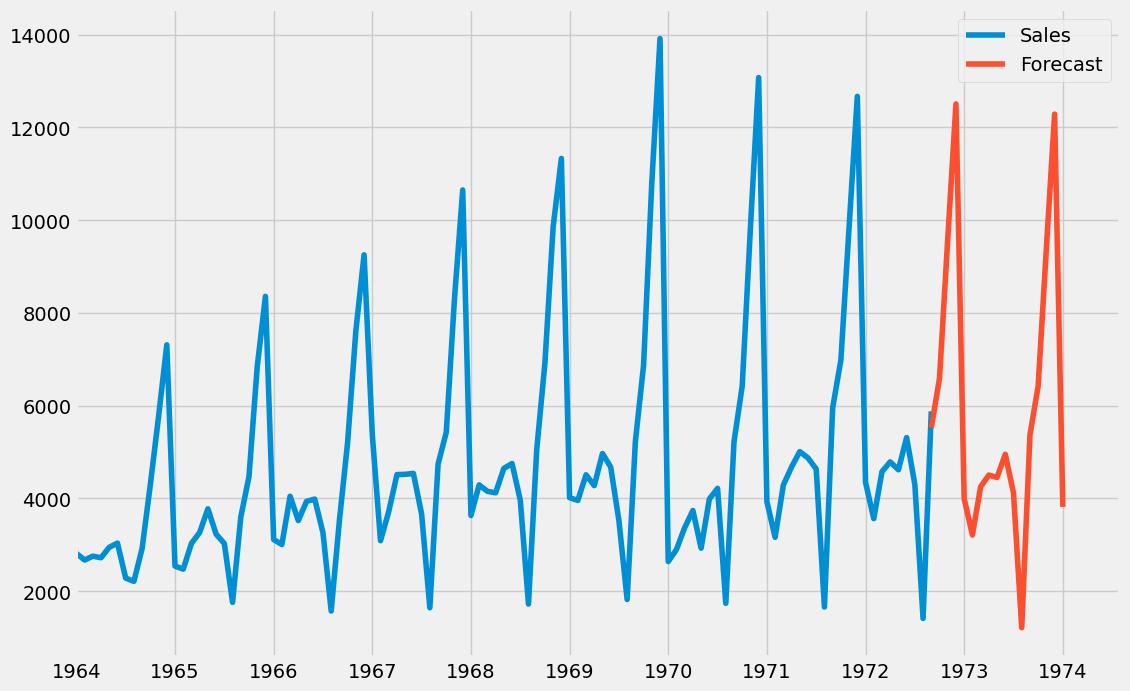

In [53]:
future_df['Forecast'] = results.predict(start = 104, end = 120, dynamic=True)
future_df[['Sales','Forecast']].plot(figsize=(12,8))